In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring Data


In [2]:
df = pd.read_csv("C:\\Users\\MH\\Downloads\\mymoviedb.csv" , lineterminator= '\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


array([[<Axes: title={'center': 'Popularity'}>,
        <Axes: title={'center': 'Vote_Count'}>],
       [<Axes: title={'center': 'Vote_Average'}>, <Axes: >]], dtype=object)

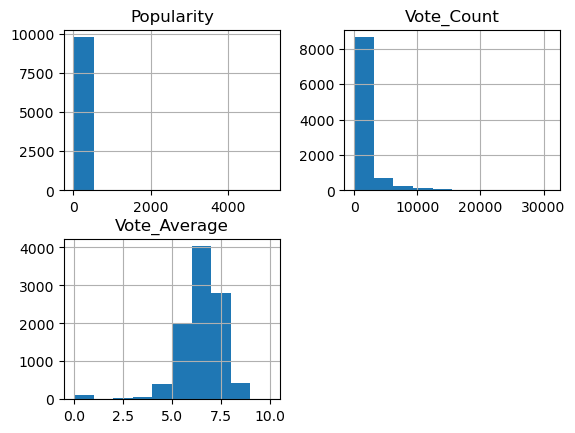

In [4]:
df.hist()

In [5]:
df.drop(columns = ["Overview" , "Poster_Url"] , inplace = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,en,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


In [6]:
df['year'] = df['Release_Date'].apply(lambda x : x.split('-')[0])
df['month'] = df['Release_Date'].apply(lambda x : x.split('-')[1])
df.drop('Release_Date' , axis = 1 , inplace = True)
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,year,month
0,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",2021,12
1,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",2022,03
2,No Exit,2618.087,122,6.3,en,Thriller,2022,02
3,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",2021,11
4,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",2021,12


In [7]:
df['Title'].value_counts()

Beauty and the Beast                      4
Alice in Wonderland                       4
The Little Mermaid                        3
The Call                                  3
Halloween                                 3
                                         ..
There's Something About Mary              1
Amores Perros                             1
The Human Centipede 3 (Final Sequence)    1
Newness                                   1
Threads                                   1
Name: Title, Length: 9513, dtype: int64

In [8]:
df['Original_Language'].unique()

array(['en', 'ja', 'fr', 'hi', 'es', 'ru', 'de', 'th', 'ko', 'tr', 'cn',
       'zh', 'it', 'pt', 'ml', 'pl', 'fi', 'no', 'da', 'id', 'sv', 'nl',
       'te', 'sr', 'is', 'ro', 'tl', 'fa', 'uk', 'nb', 'eu', 'lv', 'ar',
       'el', 'cs', 'ms', 'bn', 'ca', 'la', 'ta', 'hu', 'he', 'et'],
      dtype=object)

In [9]:
mapping = {'en' : 'English' , 'ja' : 'Japanese' , 'es' : 'Spanish' , 'fr' : 'France', 'ko' : 'Korean', 'zh' : 'Chinese', 'it' : 'Italian', 'cn' : 'Mandarin (China)', 'ru' : 'Russian', 'de' : 'German', 'pt' : 'Portuguese',
           'da' : 'Danish','no' : 'Norwegian', 'hi' : 'Hindi', 'sv' : 'Swedish', 'nl' : 'Dutch', 'pl' : 'Polish', 'th' : 'Thai', 'id' : 'Indonesian', 'tr' : 'Turkish', 'tl' : 'Tagalog', 'te' : 'Telugu',
           'el' : 'Greek', 'fi' : 'Finnish', 'sr' : 'Serbian', 'cs' : 'Czech', 'fa' : 'Persian', 'hu' : 'Hungarian', 'is' : 'Icelandic', 'ro' : 'Romanian', 'uk' : 'Ukrainian', 'ta' : 'Tamil', 'ar' : 'Arabic',
           'he' : 'Hebrew', 'ca' : 'Catalan', 'la' : 'Latin' , 'nb' : 'Norwegian Bokmål', 'bn' : 'Bengali', 'ms' : 'Malay', 'lv' : 'Latvian', 'eu' : 'Basque', 'ml' : 'Malayalam', 'et' : 'Estonian'}

df['Original_Language'] = df['Original_Language'].replace(mapping)
df['Original_Language'].value_counts()

English             7570
Japanese             645
Spanish              339
France               292
Korean               170
Chinese              129
Italian              123
Mandarin (China)     109
Russian               83
German                82
Portuguese            37
Danish                28
Norwegian             26
Hindi                 26
Swedish               23
Dutch                 21
Polish                17
Thai                  17
Indonesian            15
Turkish               15
Tagalog                8
Telugu                 6
Greek                  5
Finnish                5
Serbian                5
Czech                  4
Persian                3
Hungarian              3
Icelandic              2
Romanian               2
Ukrainian              2
Tamil                  2
Arabic                 2
Hebrew                 2
Catalan                1
Latin                  1
Norwegian Bokmål       1
Bengali                1
Malay                  1
Latvian                1


In [10]:
df['Genre'] = df['Genre'].apply(lambda x : x.split(',')[0])
df['Genre'] = df['Genre'].astype('category')
df['Genre'].value_counts()

Drama              1791
Action             1570
Comedy             1484
Horror              868
Animation           805
Adventure           586
Thriller            515
Crime               391
Family              350
Romance             304
Science Fiction     296
Fantasy             254
Documentary         184
Mystery             102
War                  89
Music                82
Western              73
History              45
TV Movie             38
Name: Genre, dtype: int64

In [11]:
df['Vote_Score'] = df['Vote_Count'] * df['Vote_Average']
df['Vote_Score'] = df['Vote_Score'] / df['Vote_Score'].max() * 100
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,year,month,Vote_Score
0,Spider-Man: No Way Home,5083.954,8940,8.3,English,Action,2021,12,28.424788
1,The Batman,3827.658,1151,8.1,English,Crime,2022,03,3.571429
2,No Exit,2618.087,122,6.3,English,Thriller,2022,02,0.294430
3,Encanto,2402.201,5076,7.7,English,Animation,2021,11,14.972488
4,The King's Man,1895.511,1793,7.0,English,Action,2021,12,4.807950


# EDA

## Which movie is more popular? Which movie is less popular?

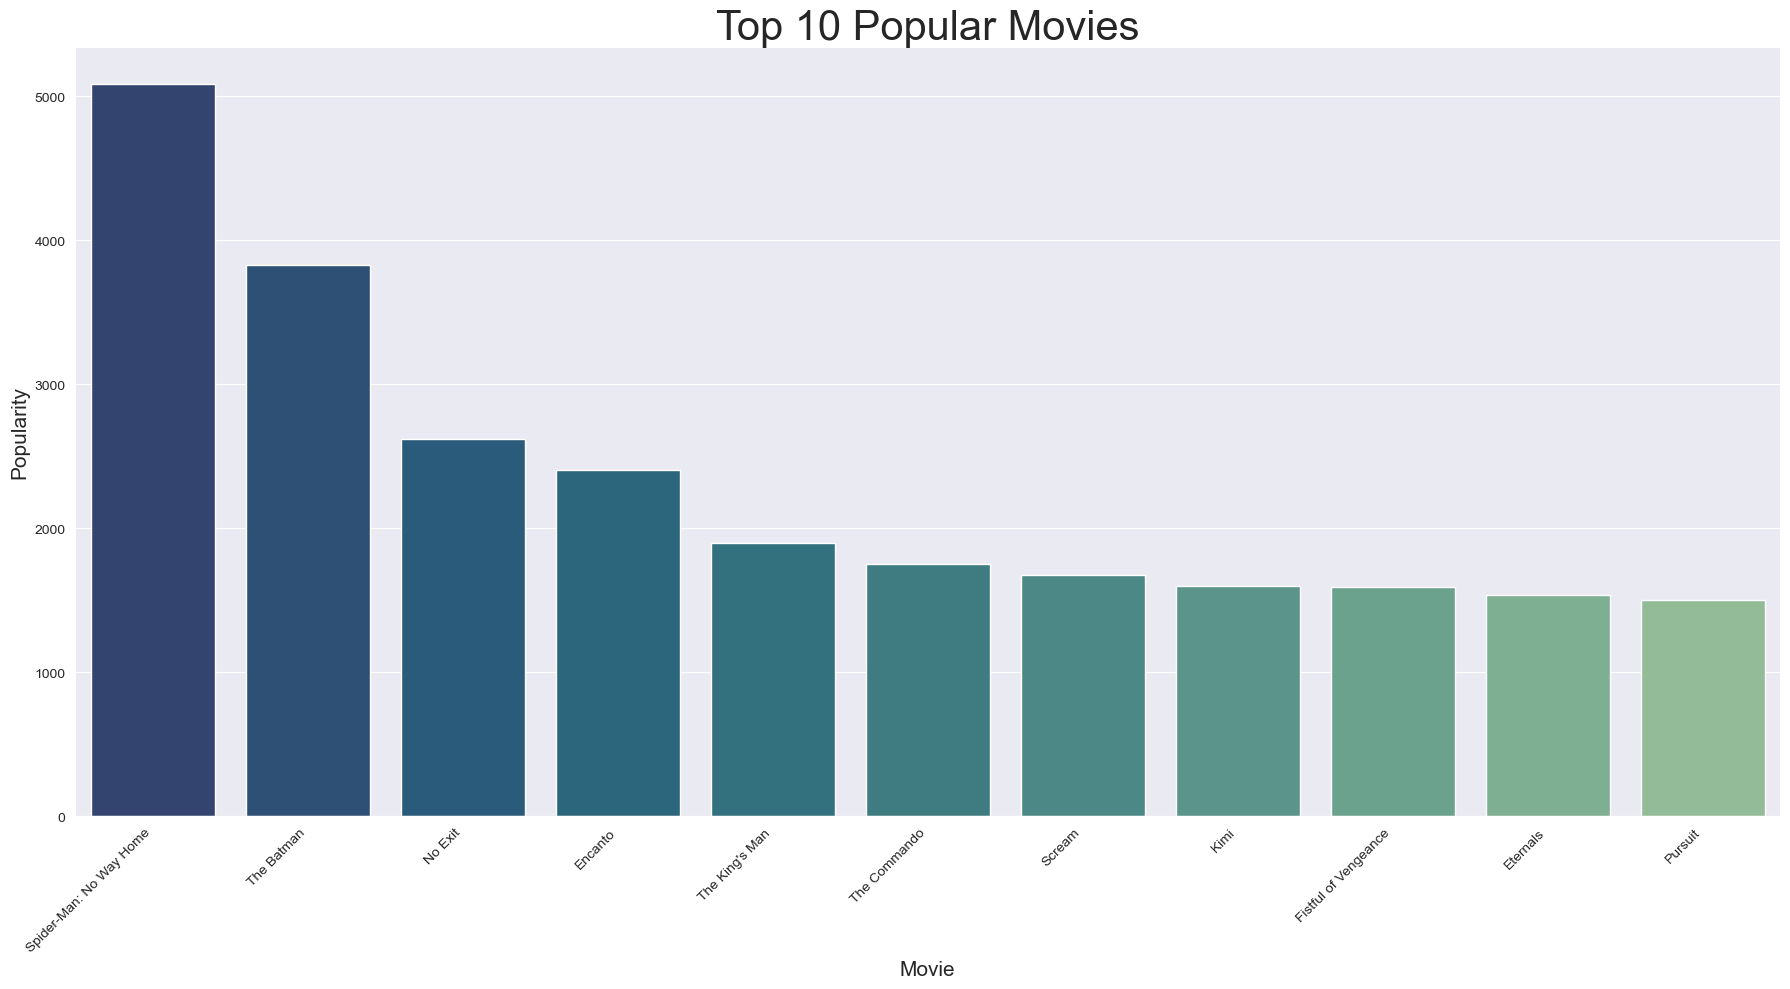

In [12]:
popular_movie = df.sort_values(by='Popularity' , ascending=False).reset_index()[:11]
plt.figure(figsize = (18,10))
sns.set_style('darkgrid')
sns.barplot(data= popular_movie, x = "Title" , y = "Popularity" ,palette = 'crest_r')
plt.xticks(rotation=45 , ha = 'right' ,fontsize = 10)
plt.xlabel("Movie" , fontsize = 15)
plt.ylabel("Popularity" , fontsize = 15)
plt.title("Top 10 Popular Movies" , fontsize = 30)
plt.tight_layout()
plt.show()

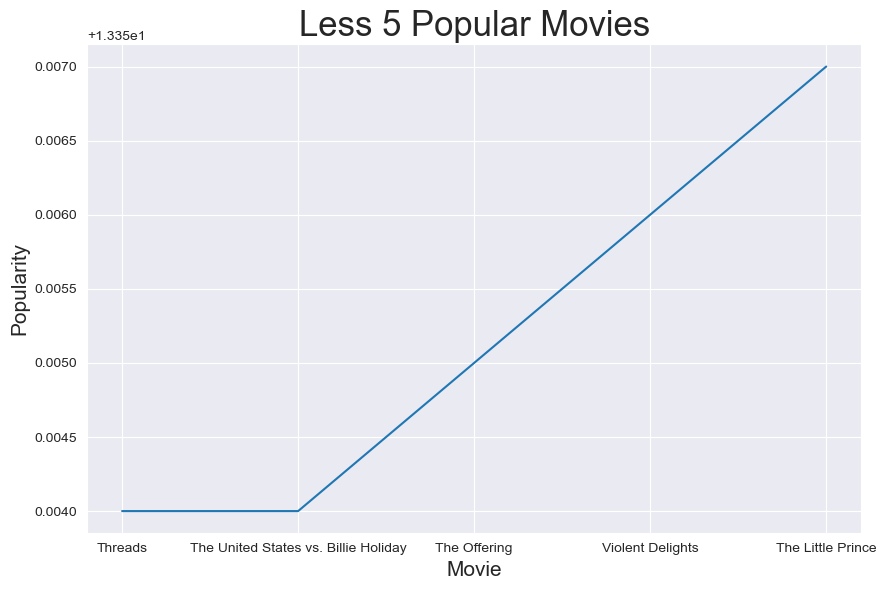

In [13]:
less = df.sort_values(by = 'Popularity' , ascending= True)
plt.figure(figsize=(9,6))
plt.plot(less['Title'].head() , less['Popularity'].head())
plt.xlabel("Movie" , fontsize = 15)
plt.ylabel("Popularity" , fontsize = 15)
plt.title("Less 5 Popular Movies" , fontsize = 25)
plt.tight_layout()

## What year was the largest number of films produced?


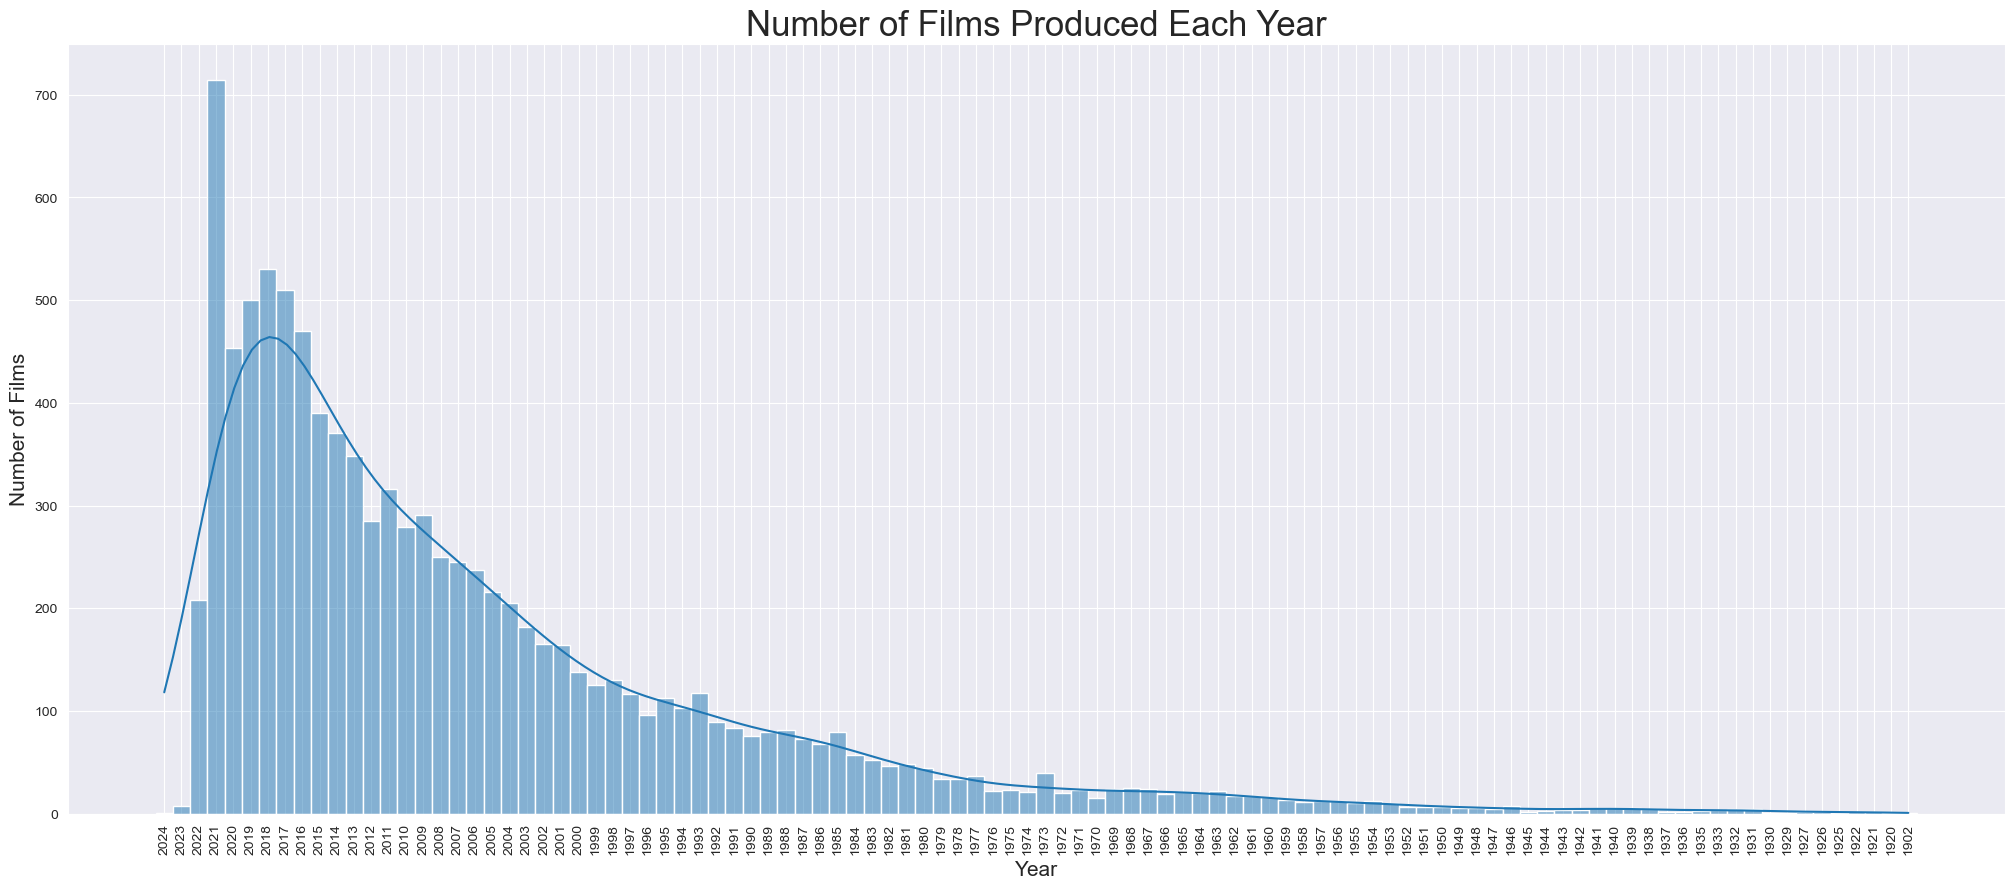

In [14]:
year_data = df.sort_values(by = 'year' , ascending= False)
plt.figure(figsize=(25, 10)) 
sns.histplot(data=year_data, x='year',kde=True)
plt.xticks(rotation=90)  
plt.xlabel('Year' , fontsize = 15)
plt.ylabel('Number of Films' , fontsize = 15)
plt.title('Number of Films Produced Each Year' , fontsize = 25)
plt.show()

## What is most of the film genre?


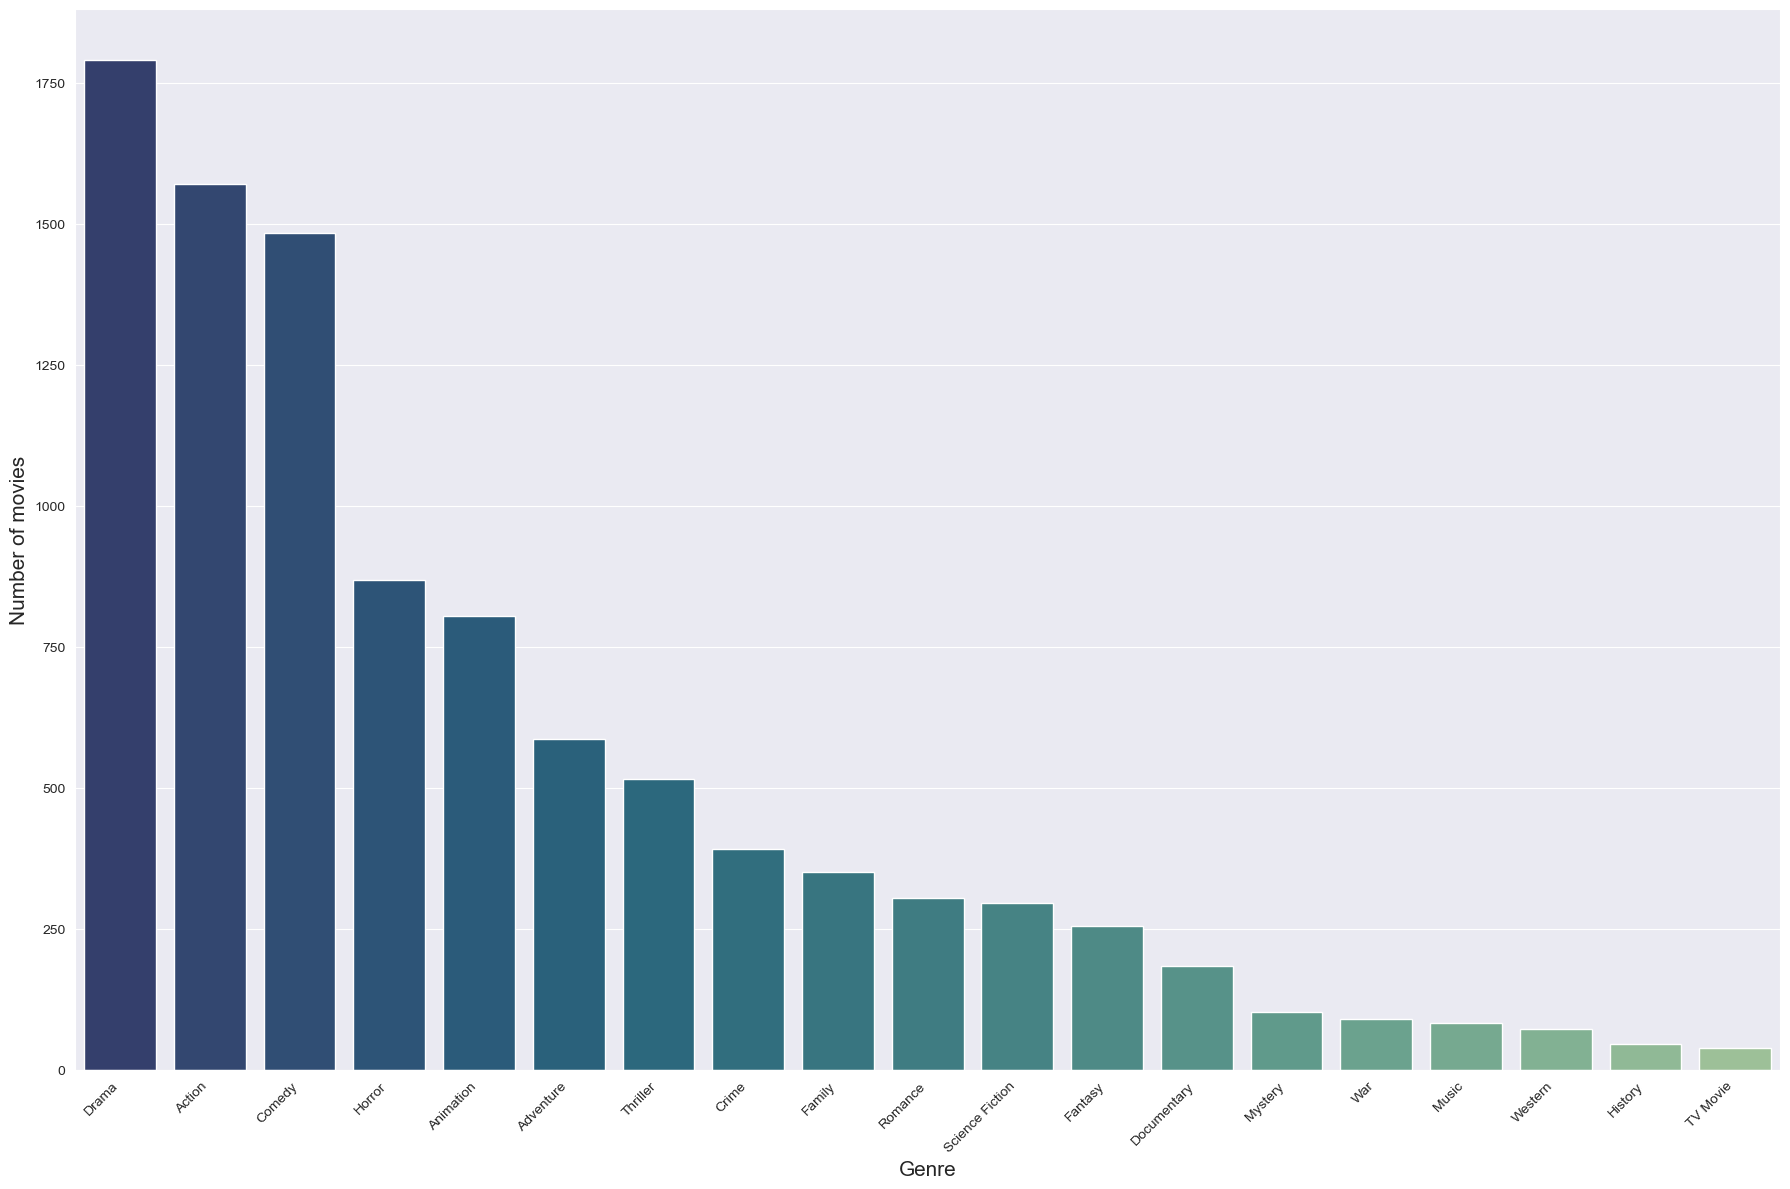

In [15]:
plt.figure(figsize = (18,12))
sns.set_style('darkgrid')
sns.countplot(data=df, x = 'Genre', order = df["Genre"].value_counts().index , palette = 'crest_r')
plt.xticks(rotation=45 , ha = 'right' ,fontsize = 10)
plt.xlabel("Genre" , fontsize = 15)
plt.ylabel("Number of movies" , fontsize = 15)
plt.tight_layout()
plt.show()

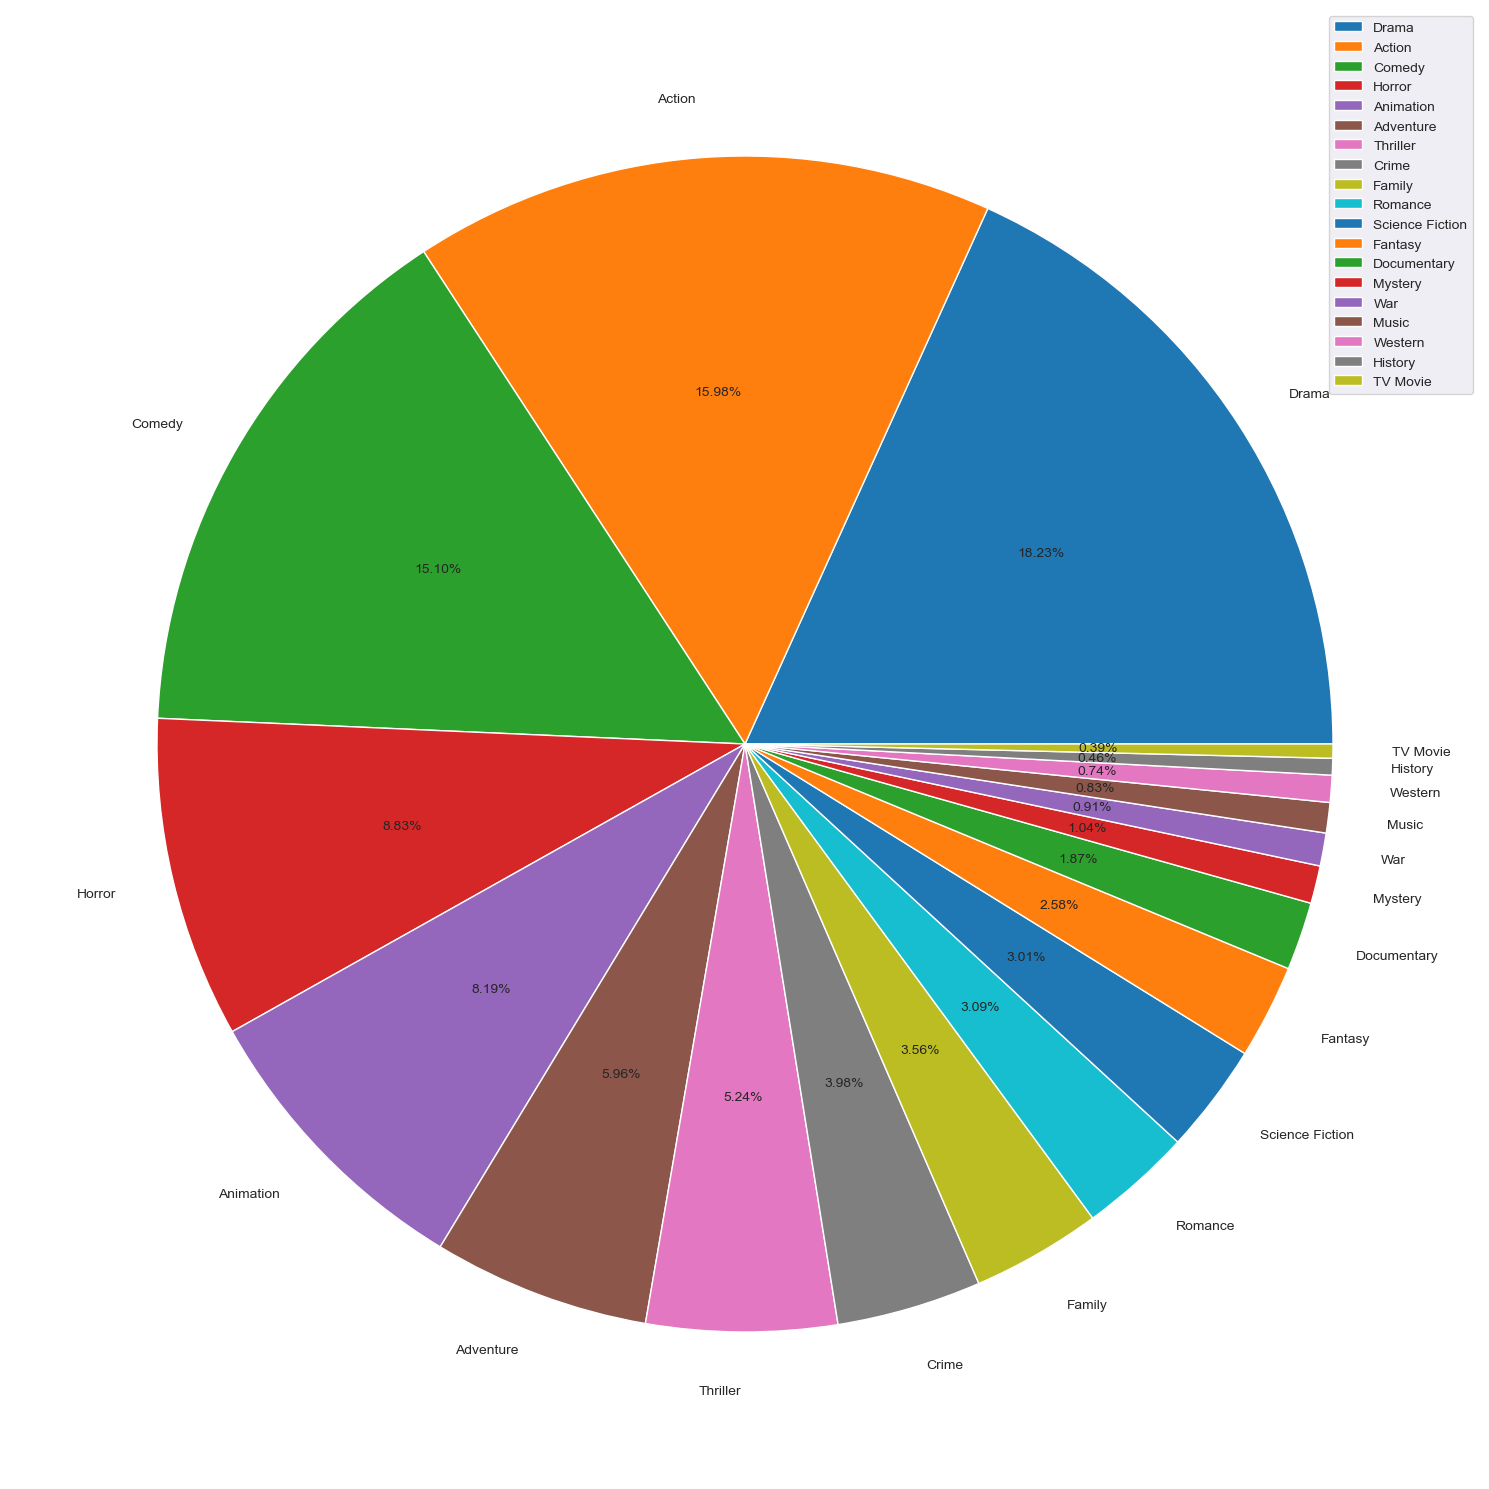

In [16]:
Genre_cnt = df['Genre'].value_counts()

plt.figure(figsize=(20,15))
plt.pie(Genre_cnt, labels= Genre_cnt.index ,autopct= '%1.2f%%')
plt.legend()
plt.tight_layout()
plt.show()

## What kind of movies take the highest rating?

In [17]:
labels = ['Low' , 'Medium' ,'High']
df['Vote_Rating'] = pd.qcut(df['Vote_Score'], q = 3 , labels=labels)
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,year,month,Vote_Score,Vote_Rating
0,Spider-Man: No Way Home,5083.954,8940,8.3,English,Action,2021,12,28.424788,High
1,The Batman,3827.658,1151,8.1,English,Crime,2022,03,3.571429,High
2,No Exit,2618.087,122,6.3,English,Thriller,2022,02,0.294430,Low
3,Encanto,2402.201,5076,7.7,English,Animation,2021,11,14.972488,High
4,The King's Man,1895.511,1793,7.0,English,Action,2021,12,4.807950,High


In [18]:
highest = df[df['Vote_Rating'] == "High"]
highest.head()

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,year,month,Vote_Score,Vote_Rating
0,Spider-Man: No Way Home,5083.954,8940,8.3,English,Action,2021,12,28.424788,High
1,The Batman,3827.658,1151,8.1,English,Crime,2022,03,3.571429,High
3,Encanto,2402.201,5076,7.7,English,Animation,2021,11,14.972488,High
4,The King's Man,1895.511,1793,7.0,English,Action,2021,12,4.807950,High
9,Eternals,1537.406,4726,7.2,English,Science Fiction,2021,11,13.034904,High


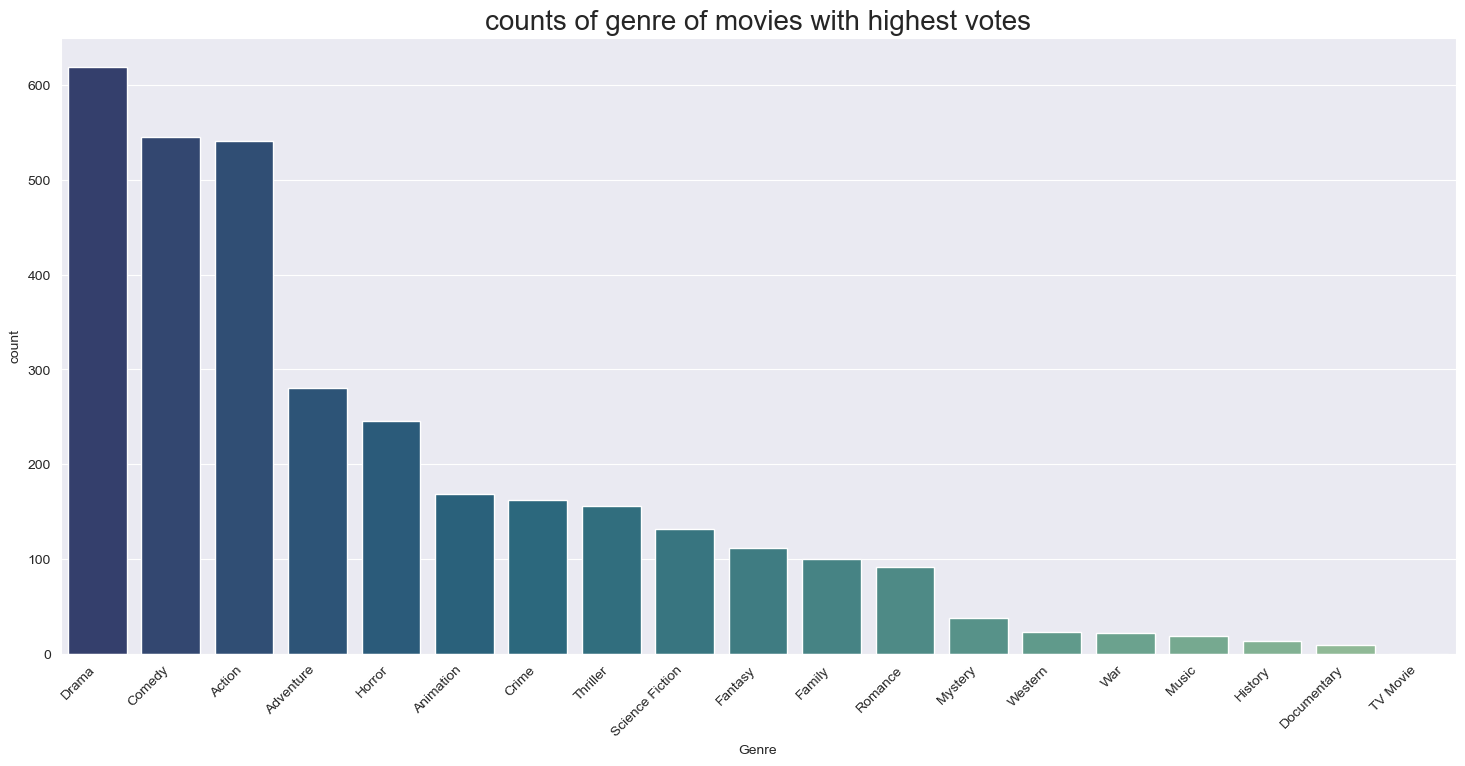

In [19]:
plt.figure(figsize=(18,8))
sns.countplot(data=highest , x = 'Genre' , order = highest['Genre'].value_counts().index , palette = 'crest_r')
plt.xticks(rotation = 45, ha = 'right' ,fontsize = 10)
plt.title('counts of genre of movies with highest votes', fontsize = 20)
plt.show()

# Conclusion

### 1- The top movie popularity is: Spider Man No way home(kind : action)
### 2- The least movies popularity are: Threads and The united states vs Billie Holiday
### 3- 2021 is the top year of making films
### 4- In general making films increasing by time
### 5- Most frequent and highest votes genre is Drama with 18.23%

